# Sentiment Analysis

## Part 2: Keras & LSTM

Use Keras to build a neural network as well as the LSTM.

In [1]:
from ml_utils import *

Using TensorFlow backend.


### LSTM

In [7]:
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform

np.random.seed(1)

In [19]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

3 dictionaries are loaded:

- `word_to_index`: dictionary mapping from words to their indices in the vocabulary (400,001 words, with the valid indices ranging from 0 to 400,000).
- `index_to_word`: dictionary mapping from indices to their corresponding words in the vocabulary.
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

The reason we need `word_to_index` is that when adding a custom embedding layer in Keras, we can only load the pretrained embedding as a matrix instead of a dictionary. A index will help us find the correct entry for a given word.

#### Embedding Layer

We need to build a embedding matrix where each row represent a word vector.

In [18]:
from keras.layers import Embedding

# A "layer factory" method to generate an embedding layer given word_to_vec mapping and word_to_index mapping
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    
    vocab_len = len(word_to_index) + 1  # Kears required index starting from 1
    emb_dim = word_to_vec_map["a"].shape[0]
    
    # Build the embedding matrix
    emb_matrix = np.zeros((vocab_len, emb_dim))
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    # Return the embedding layer
    return Embedding(
        input_dim=vocab_len, 
        output_dim=emb_dim, 
        trainable=False,  # Indicating this is a pre-trained embedding 
        weights=[emb_matrix])

### IMDB Dataset

In [3]:
from keras.preprocessing import sequence
from keras.datasets import imdb

In [4]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [5]:
# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=80)
x_test = sequence.pad_sequences(x_test, maxlen=80)
x_train.shape

(25000, 80)

In [8]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
batch_size = 32

model.fit(x_train, 
          y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 138s 6ms/step - loss: 0.4588 - acc: 0.7848 - val_loss: 0.4185 - val_acc: 0.8104
Epoch 2/15
25000/25000 [==============================] - 157s 6ms/step - loss: 0.2898 - acc: 0.8826 - val_loss: 0.3773 - val_acc: 0.8392
Epoch 3/15
25000/25000 [==============================] - 140s 6ms/step - loss: 0.2059 - acc: 0.9218 - val_loss: 0.4352 - val_acc: 0.8218
Epoch 4/15
25000/25000 [==============================] - 150s 6ms/step - loss: 0.1426 - acc: 0.9468 - val_loss: 0.5280 - val_acc: 0.8297
Epoch 5/15
25000/25000 [==============================] - 150s 6ms/step - loss: 0.1026 - acc: 0.9628 - val_loss: 0.7309 - val_acc: 0.7991
Epoch 6/15
25000/25000 [==============================] - 153s 6ms/step - loss: 0.0785 - acc: 0.9734 - val_loss: 0.6388 - val_acc: 0.8235
Epoch 7/15
25000/25000 [==============================] - 147s 6ms/step - loss: 0.0525 - acc: 0.9826 - val_loss: 0.7503 - 

In [20]:
# Save model structure
with open("imdb_model.json", "w") as fp:
    fp.write(model.to_json())

# Save model weights
model.save_weights("imdb_model.h5")

### Next Steps:

- Use the pre-trained model to replace the Embedding layer and train the model for 30 epochs.
- Collect the training history data
- Plot the accuracy and loss
- Find the best epoch number to stop traning

In [21]:
model2 = Sequential()
model2.add(pretrained_embedding_layer(word_to_vec_map, word_to_index))
model2.add(LSTM(128, dropout=0.3, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [23]:
model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [24]:
batch_size = 32

history = model2.fit(x_train, 
                     y_train,
                     batch_size=batch_size,
                     epochs=30,
                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 80s 3ms/step - loss: 0.6791 - acc: 0.5606 - val_loss: 0.6610 - val_acc: 0.5971
Epoch 2/30
25000/25000 [==============================] - 93s 4ms/step - loss: 0.6545 - acc: 0.5957 - val_loss: 0.6293 - val_acc: 0.6179
Epoch 3/30
25000/25000 [==============================] - 94s 4ms/step - loss: 0.6264 - acc: 0.6226 - val_loss: 0.6073 - val_acc: 0.6491
Epoch 4/30
25000/25000 [==============================] - 103s 4ms/step - loss: 0.6070 - acc: 0.6487 - val_loss: 0.5846 - val_acc: 0.6720
Epoch 5/30
25000/25000 [==============================] - 95s 4ms/step - loss: 0.5859 - acc: 0.6725 - val_loss: 0.5924 - val_acc: 0.6607
Epoch 6/30
25000/25000 [==============================] - 108s 4ms/step - loss: 0.5728 - acc: 0.6854 - val_loss: 0.5609 - val_acc: 0.6943
Epoch 7/30
25000/25000 [==============================] - 94s 4ms/step - loss: 0.5582 - acc: 0.6975 - val_loss: 0.5480 - val_a

In [25]:
h = history.history.copy()

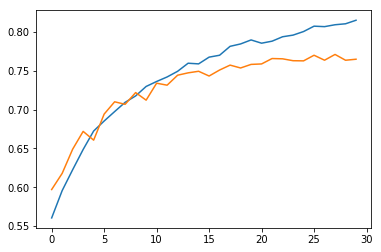

In [26]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])

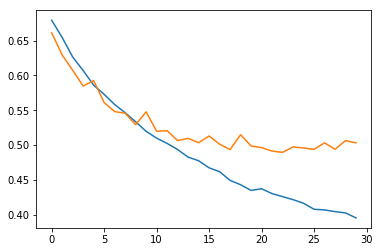

In [27]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])

In [28]:
loss, acc = model2.evaluate(x_train, y_train)
print('loss = %.4f, acc = %.2f%%' % (loss, acc * 100))

25000/25000 [==============================] - 20s 783us/step
loss = 0.2697, acc = 88.85%


In [29]:
loss, acc = model.evaluate(x_test, y_test)
print('loss = %.4f, acc = %.2f%%' % (loss, acc * 100))

25000/25000 [==============================] - 24s 977us/step
loss = 1.5241, acc = 80.13%
